# Analyse prédictive des cours des actions FAANG

Réalisé par :
* ESSOH Lasme Ephrem Dominique
* ELAOUNI Fouzia

# Introduction

Dans ce travail, nous examinerons les données du marché boursier, en particulier celles des firmes technologique. Plus précisement, nous ménons une analyse prédictive des cours des actions FAANG.  

FAANG fait référence aux actions de cinq sociétés technologiques américaines de premier plan : Facebook (FB), Amazon (AMZN), Apple (AAPL), Netflix (NFLX) ; et Alphabet ou Google (GOOG).Le terme a été inventé par Jim Cramer, l'animateur de télévision de Mad Money de CNBC, en 2013, qui a félicité ces entreprises pour être totalement dominantes sur leurs marchés.

# 1 Chargement du jeu de données et traitement des données

## Installation du module pandas_datareader

Nous utilisons le module <b>pandas_datareader</b> afin de récuperer les données, par scrapping, du cours des actions du stock market FAANG. La source de données utilisée est <a href = "https://finance.yahoo.com/"> Yahoo! La finance </a>.

In [2]:
import sys
!{sys.executable} -m pip install pandas_datareader

## Récupération des données

In [3]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader #pour récup. les datas sur yahoo finance !
from datetime import datetime #gestion de dates

### récupération des séries temporelles des cours des actions pour chaque firme de la tech

In [7]:
# liste des firmes de la tech
FAANG = ['FB','AAPL','AMZN', 'NFLX','GOOG']

# date de début et date de fin d'extraction des données : extraction de 1 année complète + 1 année retrospective de cours
fin = datetime.now()
debut = datetime(fin.year - 1, fin.month, fin.day)

# récupération des séries temporelles FB, AAPL, AMZN, NFLX et GOOG
for stock in FAANG :   
    globals()[stock] = DataReader(stock, 'yahoo', debut, fin)

#### 2 exemples du format des données

Nous avons récupérés au total 5 séries temporelles : celles de FB, AAPL, AMZN, NFLX et GOOG. Chaque séries temporelles contient 5 variables : 
* High = la valeur maximale du cours de l'action au jour aaaa-mm-jj (en USD)
* Low = la valeur minimale du cours de l'action au jour aaaa-mm-jj (en USD)
* Open = la valeur du cours de l'action à l'overture du marché au jour aaaa-mm-jj (en USD)
* Close = la valeur du cours de l'action à la fermeture du marché au jour aaaa-mm-jj (en USD)
* Volume = le volume total d'action négociés au jour aaaa-mm-jj (en nombre absolu)
* Adj Close = la valeur ajustée (par rapport au dividendes) du cours de l'action à la fermeture du marché au jour aaaa-mm-jj (en USD)

Par exemple, affichons 5 observations au harsard des données de FACEBOOK et APPLE :

In [8]:
FB.sample(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-02,161.350006,155.919998,159.100006,158.190002,20886300,158.190002
2020-10-06,265.690002,258.239990,261.779999,258.660004,18696900,258.660004
2020-09-23,257.989990,248.149994,255.259995,249.020004,19641300,249.020004
2020-03-31,170.929993,164.199997,165.479996,166.800003,23676300,166.800003
2020-07-17,244.160004,237.860001,241.000000,242.029999,18152400,242.029999


In [9]:
AAPL.sample(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-04,122.860001,121.519997,122.599998,122.250000,78260400.0,122.250000
2020-12-03,123.779999,122.209999,123.519997,122.940002,78967600.0,122.940002
2019-12-20,70.662498,69.639999,70.557503,69.860001,275978000.0,68.699387
2020-02-10,80.387497,78.462502,78.544998,80.387497,109348800.0,79.239594
2020-07-28,94.550003,93.247498,94.367500,93.252502,103625600.0,92.924355


#### constitution de données de panel

A partir des 5 séries temporelles récupérées, nous constituons des données de panel en concatenant ces séries.

In [10]:
liste_firme = [FB, AAPL, AMZN, NFLX, GOOG]
nom_firme = ["FACEBOOK", "APPLE", "AMAZON", "NETFLIX", "GOOGLE"]

for firme, nom in zip(liste_firme, nom_firme):
    firme["Nom firme"] = nom
    
data = pd.concat(liste_firme, axis = 0)

Données finales : 
* Structure de données de panel $X_{it}$, $X_{it}$ désignant un vecteur ligne du tableau
* Contenant 5 individus statistiques (les firmes) : $i \in {1 \ldots 5}$
* Observés à une jour $t$ entre le jour d'aujourd'hui et le jour d'aujourd'hui diminué d'une année. Par exemple, au jour du 10/12/2020 d'utilisation de ce notebook, les données couvrent la période allant du 10/12/2019 au 10/12/2020.

In [11]:
data

,High,Low,Open,Close,Volume,Adj Close,Nom firme
Date,,,,,,,
2019-12-11,202.630005,200.279999,200.279999,202.259995,8036800.0,202.259995,FACEBOOK
2019-12-12,203.660004,194.100006,202.350006,196.750000,23734800.0,196.750000,FACEBOOK
2019-12-13,196.800003,193.169998,196.399994,194.110001,18798000.0,194.110001,FACEBOOK
2019-12-16,199.119995,194.809998,195.270004,197.919998,14911500.0,197.919998,FACEBOOK
2019-12-17,199.000000,196.130005,198.839996,198.389999,10175700.0,198.389999,FACEBOOK
...,...,...,...,...,...,...,...
2020-12-07,1832.369995,1805.780029,1819.000000,1819.479980,1320900.0,1819.479980,GOOGLE
2020-12-08,1821.900024,1796.204956,1810.099976,1818.550049,1096300.0,1818.550049,GOOGLE
2020-12-09,1834.270020,1767.810059,1812.010010,1784.130005,1507600.0,1784.130005,GOOGLE


# 2. Statistique descriptive et visualisation

#### Niveau moyen des cours et du volume des actions négociés

In [12]:
vm_stock_2020 = round(data.groupby([(data.index.year), (data["Nom firme"])]).mean().loc[2020,:],2)

In [13]:
vm_stock_2020

,High,Low,Open,Close,Volume,Adj Close
Nom firme,,,,,,
AMAZON,2687.92,2612.55,2651.58,2651.27,4.991203e+06,2651.27
APPLE,94.76,92.02,93.37,93.45,1.474372e+08,92.91
FACEBOOK,235.86,228.70,232.24,232.46,2.271495e+07,232.46
GOOGLE,1484.72,1447.30,1464.78,1466.87,1.909858e+06,1466.87
NETFLIX,450.19,434.10,441.99,442.53,7.118362e+06,442.53


#### Evolution du cours des actions journalié

Cette évolution sera apprécié avec la valeur ajustée du cours de l'action ajusté à la fermeture du marché.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

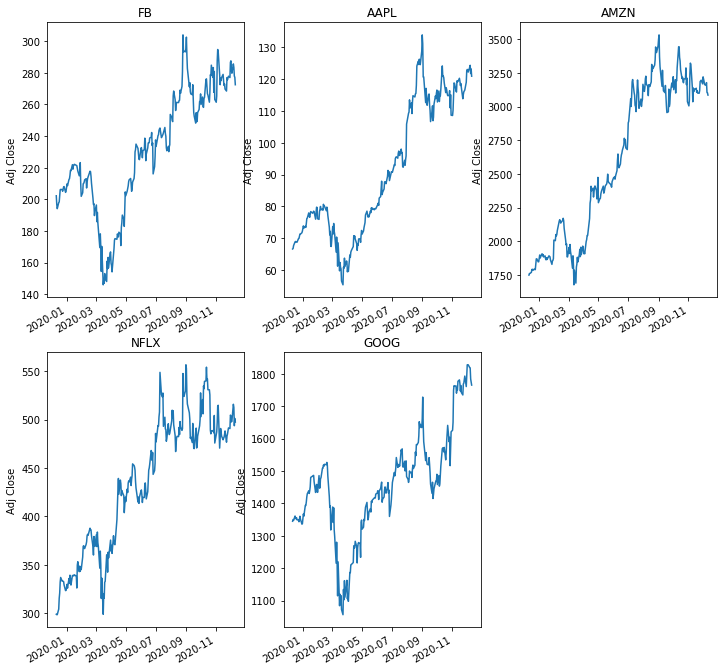

In [15]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, firme in enumerate(liste_firme, 1):
    plt.subplot(2, 3, i)
    firme['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{FAANG[i - 1]}")

Soit $x_t$ le cours de l’action X au jour t, le rendement simple n'est autre que
 $r^*_t=\frac{x_t-x_{t-1}}{x_{t-1}}$
 
On notera aussi le log-rendement comme suit : $r_t={\mathrm{log} (\ \frac{x_t}{x_{t-1}}\ )\ }={\mathrm{log} (r^*_t+1\ \ )\ }$  
Le développement limité au voisinage de $r_t$ donne :

$r_t={\mathrm{log} (r^*_t+1\ \ )\ }$ $\approx$ $r^*_t$

##### Pourquoi le log-rendement ? : 
On suppose dans divers cas que les prix suivent une distribution log normal pour des raisons relatives au comportement en queue de distribution.
Première intuition : Les prix $x_t$  d'après les notations introduites précédemment
  $x_t={x_{t-1}(r}^*_t+1){\ q}_t$. On se demande quelle distribution $q_t$  peut suivre : t manipuler
ici à une unité de jours, on s'intéressera à l'évolution du prix durant la journée :par exemple $x_{0.5}$  le prix durant la première demi-journée etc. ... On a pour  $h=\frac{1}{m}$ 
 

 $r^*_t=\frac{x_1}{x_0}$ $=\frac{x_{mh}\ \ x_{\left(m-1\right)h\ }}{x_{\left(m-1\right)h\ }\ \ x_{\left(m-2\right)h\ }}$... $\frac{x_h}{x_0}$ 
    $ \Longrightarrow \ \ {\mathrm{log} \left({\ q}_t\ \right)=\sum^{k=m}_{k=1}{\frac{x_{kh}}{x_{\left(k-1\right)h}}}\ }$  

Si les v. a sont i.i.d, $r_t^*$ représentera une somme de m v.a i.i.d, le théorème centrale limite permet de conclure sur la normalité de $r_t$ l'utilisation de ce dernier.
 Il est à noter que le log rendement affaiblit aussi l'hétérocédasticité et la colinéarité des données.


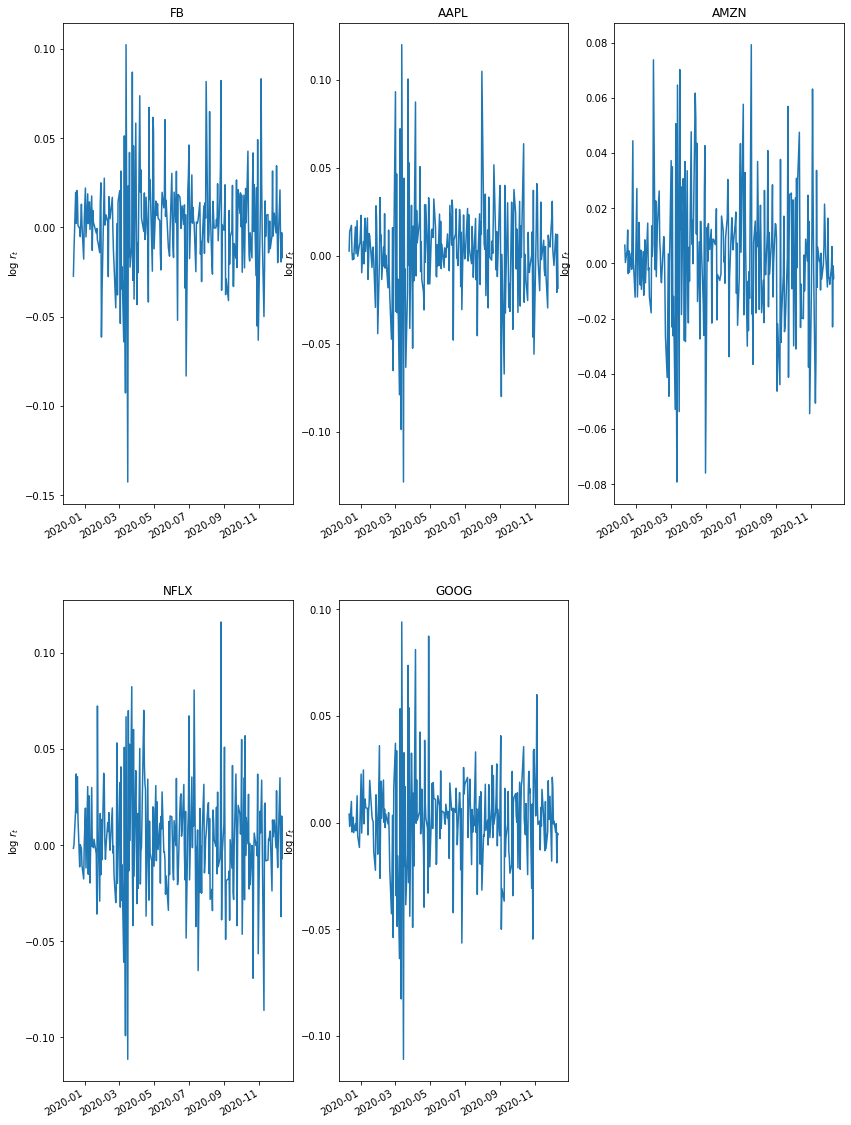

In [50]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, firme in enumerate(liste_firme, 1):
    plt.subplot(2, 3, i)
    firme['Adj Close'].pct_change().plot()
    plt.ylabel('log $r_t$')
    plt.xlabel(None)
    plt.title(f"{FAANG[i - 1]}")
    

On remarque déjà l'absence de tendance dans la série du log-rendement, avec grand choc au mois de mars à cause de la crise pandémique, ce qui attendu !

### Normalité

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

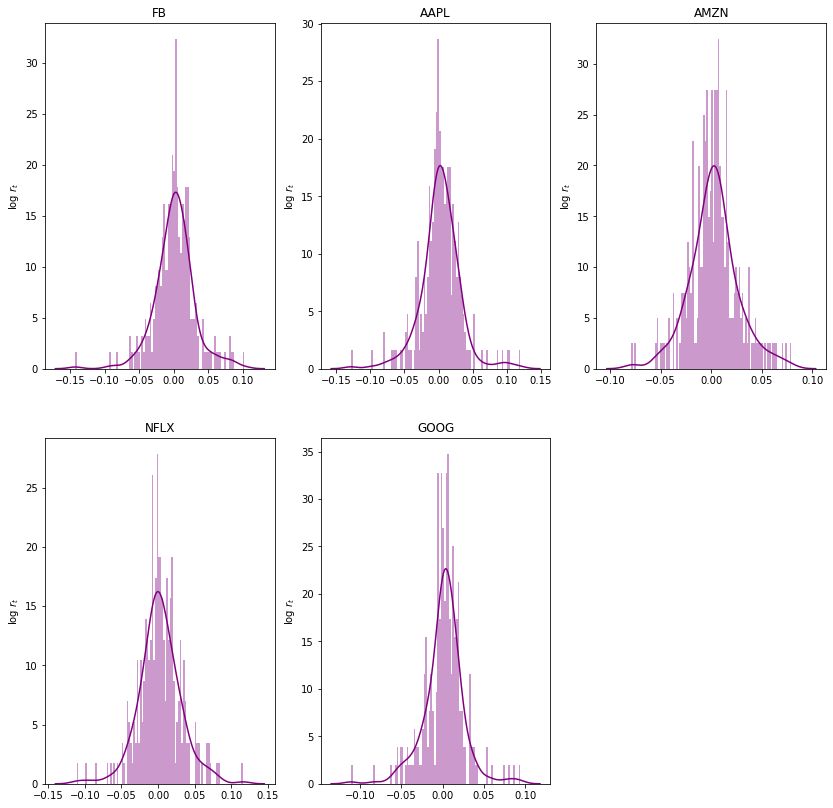

In [52]:
plt.figure(figsize=(14, 14))
for i, firme in enumerate(liste_firme, 1):
    plt.subplot(2, 3, i)
    sns.distplot(firme['Adj Close'].pct_change().dropna(), bins=100, color='purple')
    plt.ylabel('log $r_t$')
    plt.xlabel(None)
    plt.title(f"{FAANG[i - 1]}")

Beaucoup de faits montrent que les distributions de rendements des actifs financiers ont des queues plus épaisses que les distributions normales comme mentionnées auparavant. Nous allons vérifier si les courbes de rendement des différents actifs représentent la distribution gaussienne par un test qui se base seulement sur les valeurs de coefficient d’asymétrie et du coefficient d'aplatissement de la distribution :


 #### Test de Jarque-Bera.
$H_0$ $:$ " la distiribution suit une loi normale "

La statistique de Jaque-Bera est: $JB=\frac{n}{6}$$(S^2+\frac{(k-3)^2}{4})$

Cette statistique suit une loi de $\chi^2$ de degré de libérté 2.
  
Avec :

-$n$ le nombre d'observations 

-$coef f d'assymétrie=S=$$\frac{\frac{1}{n}\sum^n_{i=1}{{(x_i-\overline{x\ })}^3}}{{(\frac{1}{n}\sum^n_{i=1}{{(x_i-\overline{x\ })}^2)}}^{\frac{3}{2}}}$

-$coef f d'applatissement=k=$$\frac{\frac{1}{n}\sum^n_{i=1}{{(x_i-\overline{x\ })}^4}}{{(\frac{1}{n}\sum^n_{i=1}{{(x_i-\overline{x\ })}^2)}}^2}$


   
Nous utilisons le module stats de scipy pour réaliser le test de Jarque-Bera.

In [58]:
from scipy import stats
x=firme['Adj Close'].pct_change().dropna()
jarque_bera_test = stats.jarque_bera(x)
jarque_bera_test

Jarque_beraResult(statistic=147.33084224174826, pvalue=0.0)

In [59]:
from scipy import stats
for i, firme in enumerate(liste_firme, 1):
    x=firme['Adj Close'].pct_change().dropna()
    print("JB"f"{FAANG[i - 1]}", "=====" ,stats.jarque_bera(x) )

JBFB ===== Jarque_beraResult(statistic=125.08076656953949, pvalue=0.0)
JBAAPL ===== Jarque_beraResult(statistic=153.52855899225705, pvalue=0.0)
JBAMZN ===== Jarque_beraResult(statistic=15.5780296841473, pvalue=0.00041426079532336235)
JBNFLX ===== Jarque_beraResult(statistic=46.63075100327056, pvalue=7.486189446126446e-11)
JBGOOG ===== Jarque_beraResult(statistic=147.33084224174826, pvalue=0.0)


On rejete $H_0$ pour les 5 actions puisque toutes les P-values sont  inférieures à 5 %. Donc nous sommes loin de distribution normale. D'ailleurs, le résultat était prévisible puisque les distributions de rendements de ces actifs financiers ont des queues plus épaissés que les distributions normales.

# 5. Modélisation

# Conclusion